# Asgmt: Polynomial Regression using Solar_Power_Generation.csv

## Importing the libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [66]:
dataset = pd.read_csv('Solar_Power_Generation.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values                    # target

In [67]:
print(X)

[[   2.17       31.       1035.       ...   58.753108   83.237322
   128.33543 ]
 [   2.31       27.       1035.1      ...   45.408585   75.143041
   139.6553  ]
 [   3.65       33.       1035.4      ...   32.848282   68.820648
   152.53769 ]
 ...
 [   7.27       90.       1026.3      ...   25.249506   65.827032
   197.33868 ]
 [   8.25       81.       1025.5      ...   36.361161   70.496313
   211.30027 ]
 [   8.         80.       1025.3      ...   48.452849   76.919574
   223.04931 ]]


In [68]:
print(y)

[ 454.10095  1411.9994   2214.8493   ...  158.36778   126.95306
   20.055031]


In [69]:
y = np.array(y) #convert y to numpy array

In [70]:
print(y)

[ 454.10095  1411.9994   2214.8493   ...  158.36778   126.95306
   20.055031]


## Handle Nan Value



In [71]:
missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)

temperature_2_m_above_gnd            1
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    1
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        1
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   1
dtype: int64


In [72]:
# fill missing values with the mean value of the column (Total Bedrooms)

dataset = dataset.fillna(dataset.median())

missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64


In [73]:
# fill missing values with the mean value 

X = pd.DataFrame(X).fillna(pd.DataFrame(X).median()).values
y = pd.DataFrame(y).fillna(pd.DataFrame(y).median()).values

## Training the Linear Regression model on the whole dataset

In [74]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) 




LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [75]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2) # degree is the power of the polynomial
X_poly = poly_reg.fit_transform(X) # this will transform the X into X^2, X^3, X^4
lin_reg_2 = LinearRegression() 
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Predicting a new result with Linear Regression

In [76]:
y_pred = lin_reg.predict(X)

In [77]:
#To get Performance Metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'R-squared: {r2:.4f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


R-squared: 0.7066
MAE: 391.27
RMSE: 508.01


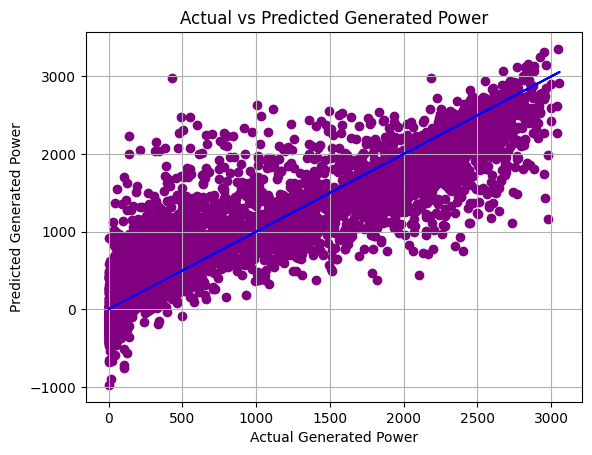

In [86]:
# Visualizing the Linear Regression results


plt.scatter(y, y_pred, color='Purple')
plt.plot(y, y, color='Blue')
plt.xlabel("Actual Generated Power")
plt.ylabel("Predicted Generated Power")
plt.title("Actual vs Predicted Generated Power")
plt.grid(True)
plt.show()


## Predicting a new result with Polynomial Regression

In [79]:
y_pred = lin_reg_2.predict(X_poly)

In [80]:
#To get Performance Metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'R-squared: {r2:.4f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

R-squared: 0.7943
MAE: 308.00
RMSE: 425.35


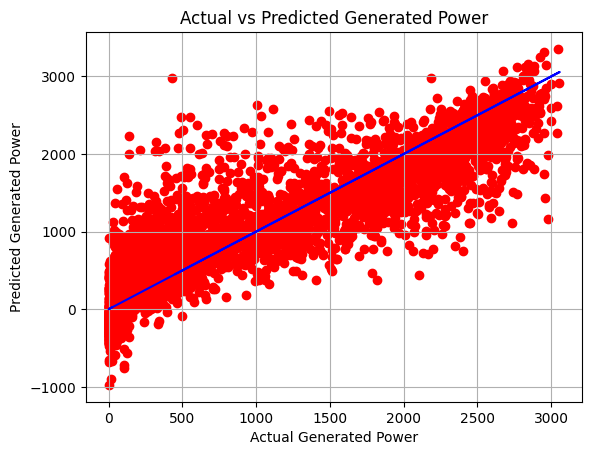

In [87]:
# Visualizing the Polynomial Regression results

plt.scatter(y, y_pred, color='Red')
plt.plot(y, y, color='Blue')
plt.xlabel("Actual Generated Power")
plt.ylabel("Predicted Generated Power")
plt.title("Actual vs Predicted Generated Power")
plt.grid(True)
plt.show()